# Корреляция и зависимость

---

**Источники:**

[Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)

[Корреляция](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)

[Как использовать корреляцию для понимания взаимосвязи между переменными](https://www.machinelearningmastery.ru/how-to-use-correlation-to-understand-the-relationship-between-variables/)

[Применение корреляционного анализа в психологии](https://psyjournals.ru/psyedu/2009/n1/Shishlyannikova_full.shtml)

[Визуализируйте данные машинного обучения в Python с помощью Pandas](https://www.machinelearningmastery.ru/visualize-machine-learning-data-python-pandas/)

[NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)

[Корреляция не подразумевает причинно-следственной связи - Correlation does not imply causation Корреляция не подразумевает причинно-следственной связи](https://ru.qaz.wiki/wiki/Correlation_does_not_imply_causation)

[Регрессионный анализ](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install numpy pandas matplotlib seaborn-y

In [3]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.3'

In [6]:
import matplotlib

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

Для примера возьмем [данные (dataset) Gapminder World](https://www.kaggle.com/tklimonova/gapminder-datacamp-2007).

In [8]:
df = pd.read_csv('./../../data/gapminder_full.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


In [9]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Что такое корреляция?

Переменные в наборе данных могут быть связаны по многим причинам.

Например:
- Одна переменная может вызывать или зависеть от значений другой переменной.
- Одна переменная может быть легко связана с другой переменной.
- Две переменные могут зависеть от третьей неизвестной переменной.

**Корреля́ция (от лат. correlatio "соотношение")**, или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Математической мерой корреляции двух случайных величин служит корреляционное отношение $\eta$ либо коэффициент корреляции $R$ (или $r$).


В случае если изменение одной случайной величины не ведёт к закономерному изменению другой случайной величины, но приводит к изменению другой статистической характеристики данной случайной величины, то подобная связь не считается корреляционной, хотя и является статистической.

Отсутствие корреляции между двумя величинами ещё не значит, что между ними нет никакой связи. 

Зависимость может иметь сложный нелинейный характер, который корреляция не выявляет.

**Корреляция** может быть **положительной**, что означает, что обе переменные движутся в одном и том же направлении, или **отрицательной**, что означает, что когда значение одной переменной увеличивается, значения других переменных уменьшаются.

**Корреляция** также может быть **нулевой**, что означает, что переменные не связаны.

**Положительное** соотношение: обе переменные изменяются в одном направлении.
**Нейтральная** корреляция: Нет связи в изменении переменных.
**Отрицательная** корреляция: переменные меняются в противоположных направлениях.

![](./images/correlation.png)

## Отличие корреляции от причинно-следственной связи

Часто заманчивая простота корреляционного исследования подталкивает исследователя делать ложные интуитивные выводы о наличии причинно-следственной связи между парами признаков, в то время как коэффициенты корреляции устанавливают лишь статистические взаимосвязи. 

**Корреляция не подразумевает причинно-следственной связи.** То есть нельзя обоснованно вывести причинно-следственную связь между двумя событиями или переменными исключительно на основе наблюдаемой ассоциации или корреляции между ними.

Идея о том, что "корреляция подразумевает причинно-следственную связь", является примером логической ошибки с сомнительной причиной, в которой два события, происходящие вместе, считаются установившими причинно-следственную связь.

Это заблуждение также известно по латинскому выражению cum hoc ergo propter hoc ("с этим, поэтому из-за этого").

Это отличается от заблуждения, известного как post hoc ergo propter hoc ("после этого, следовательно, из-за этого"), в котором событие, следующее за другим, рассматривается как необходимое следствие предыдущего события, а от слияния - ошибочное слияние двух события, идеи, базы данных и т. д. в одно целое.


Как и в случае с любой логической ошибкой, определение того, что аргумент в основе аргумента ошибочен, не обязательно означает, что итоговый вывод является ложным.

Существуют статистические методы, использующие корреляцию в качестве основы для проверки гипотез о причинной связи, включая тест причинности Грейнджера и конвергентное перекрестное отображение.


Например, рассматривая пожары в конкретном городе, можно выявить весьма высокую корреляцию между ущербом, который нанёс пожар, и количеством пожарных, участвовавших в ликвидации пожара, причём эта корреляция будет положительной. Из этого, однако, не следует вывод "увеличение количества пожарных приводит к увеличению причинённого ущерба", и тем более не будет успешной попытка минимизировать ущерб от пожаров путём ликвидации пожарных бригад. 

## Корреляционный анализ

**Корреляционный анализ** — метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными.

**Корреляционный анализ** тесно связан с регрессионным анализом (также часто встречается термин "корреляционно-регрессионный анализ", который является более общим статистическим понятием), с его помощью определяют необходимость включения тех или иных факторов в уравнение множественной регрессии, а также оценивают полученное уравнение регрессии на соответствие выявленным связям (используя коэффициент детерминации).


**Производительность некоторых алгоритмов может ухудшиться, если две или более переменных тесно связаны между собой, что называется мультиколлинеарностью.** Примером является линейная/логистическая регрессия, где одна из нарушенных коррелированных переменных должна быть удалена, чтобы улучшить навыки модели.

Часто может быть полезна корреляция между входными переменными и выходной переменной, чтобы дать представление о том, какие переменные могут или не могут иметь значение в качестве входных данных для разработки модели.

## Матрица корреляции

**Матрица корреляции** является симметричной, то есть нижний левый угол матрицы совпадает с верхним правым.

Это полезно, так как можно увидеть два разных представления одних и тех же данных на одном графике.

Также можно увидеть, что каждая переменная идеально положительно коррелирует друг с другом (как и следовало ожидать) в диагональной линии сверху вниз слева направо.



[pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

In [10]:
corr = df.corr()

corr

,year,population,life_exp,gdp_cap
year,1.00,0.08,0.44,0.23
population,0.08,1.00,0.06,-0.03
life_exp,0.44,0.06,1.00,0.58
gdp_cap,0.23,-0.03,0.58,1.00


<AxesSubplot:>

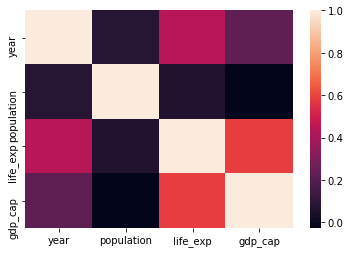

In [11]:
sns.heatmap(corr)

<AxesSubplot:>

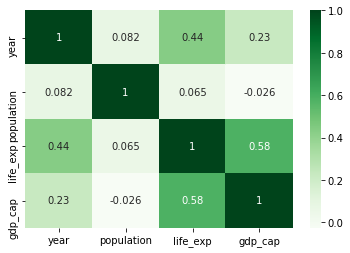

In [12]:
sns.heatmap(corr, cmap="Greens", annot=True)

In [13]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Gapminder World")\
    .set_precision(2)\
    .set_table_styles(magnify())

,year,population,life_exp,gdp_cap
year,1.00,0.08,0.44,0.23
population,0.08,1.00,0.06,-0.03
life_exp,0.44,0.06,1.00,0.58
gdp_cap,0.23,-0.03,0.58,1.00


## Матрица рассеивания (`scatter_matrix`)

Диаграмма рассеяния показывает отношение между двумя переменными в виде точек в двух измерениях, по одной оси для каждого атрибута. 

Можно создать график рассеяния для каждой пары атрибутов данных.

Объединение всех этих диаграмм рассеяния называется матрицей диаграммы рассеяния.

Диаграммы рассеяния полезны для определения структурированных отношений между переменными, например, можно ли суммировать отношения между двумя переменными с помощью линии.

Атрибуты со структурированными отношениями также могут быть соотнесены и являются хорошими кандидатами для удаления из набора данных.

[pandas.plotting.scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

[seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

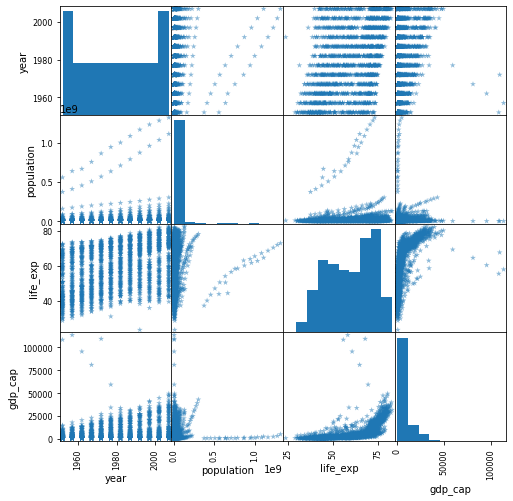

In [14]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df, 
                    figsize=(8, 8), 
                    diagonal='hist', 
                    marker='*')

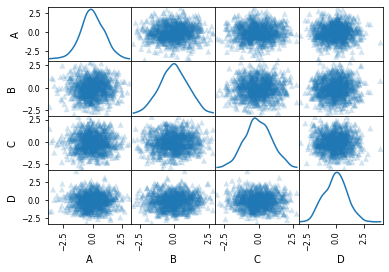

In [15]:
df_tmp = pd.DataFrame(np.random.randn(1000, 4), 
                      columns=['A','B','C','D'])

sm = pd.plotting.scatter_matrix(df_tmp, 
                                alpha=0.2, 
                                diagonal='kde', 
                                marker="^")

In [16]:
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


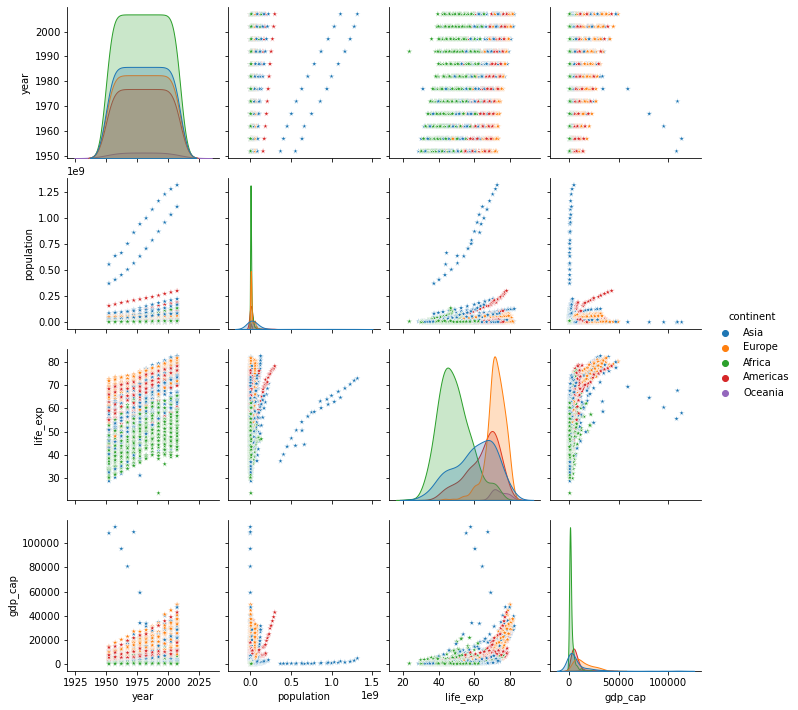

In [17]:
sns.pairplot(df, 
             hue='continent',
             markers='*')

In [ ]:
sns.pairplot(df, 
             hue='continent', 
             markers='^', 
             diag_kind='hist')

In [ ]:
sns.pairplot(df, 
             hue='continent', 
             diag_kind='kde',
             kind='hist')